# Finite Slab of Medium with Vacuum Boundary Conditions

In the same way  we have set up the problem for the Plane Source in an Infinite Medium, the equation for finite slab geometries is expressed in the following shape:

\begin{equation}
  \frac{d^{2}\phi(x)}{dx^{2}} - \frac{\phi(x)}{L^{2}}
   = - \frac{S(x)}{D}
   = - \frac{S_0}{D} \delta(x)
\end{equation}

What effectively changes is the way we express the Boundary Conditions. Now we do not have an ininite medium but a slab with a finite extention in space. For semplicity we decide to place the plane isotropic source in $x=0$, and define the slab's overall width as $Width=a$. The interfaces between the medium and the vacuum are in this way located at $x=+\frac{a}{2}$ and $x=-\frac{a}{2}$. We have to take into account the *Vacuum Boundary Conditions* that refer to the *Extrapolated Lenght* $\pm\frac{\tilde a}{2}$

*HOMOGENEOUS EQUATION:*


\begin{equation}
  \frac{d^{2}\phi(x)}{dx^{2}} - \frac{\phi(x)}{L^{2}} = 0
\end{equation}


*VACUUM BOUNDARY CONDITION:*


\begin{aligned}
 &(a)\;\;\;\; \lim_{x \rightarrow 0^{\pm}} -D \frac{d\phi}{dx} = S_0 \\
 &(b)\;\;\;\; \phi(\pm\frac{\tilde a}{2}) = 0
\end{aligned}


*COEFFICIENTS' SOLUTION:*

\begin{aligned}
 &\ C_2 = - C_1 \; exp(- \frac{\tilde a }{L}) \\
 &\ C_1 = \frac{S L}{2 D} \; (\,1 + exp(- \frac{\tilde a }{L})\,)^{-1}
\end{aligned}

*FINAL SOLUTION:*

\begin{equation}
  \phi(x)
  = \frac{S L}{2 D} \; \frac{exp(- \frac{x}{L}) - exp(\frac{-(\tilde a -x)}{L})}
    {1+exp(-\frac{\tilde a}{L})}
  = \frac{S L}{2 D} \; \frac{\sinh[\frac{(\tilde a - 2|x|)}{2L}]}
    {cosh(\frac{\tilde a}{2L})}
\end{equation}


In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#variables and functions

x, a, a_tilde = sp.symbols("x, a, a_tilde")

So = sp.Symbol("So")
D = sp.Symbol("D")
L = sp.Symbol("L")
Sigma_a = sp.Symbol("Sigma_a")

Phi, S = sp.symbols("Phi, S", cls=sp.Function)

C1, C2 = sp.symbols("C1, C2")

In [3]:
#Source
Source = sp.Eq(S(x), So*sp.DiracDelta(x))
print("Source:\n")
Source

Source:



Eq(S(x), So*DiracDelta(x))

In [4]:
#Homogeneous equation and solution
Homo_Equation = sp.Eq(Phi(x).diff(x,2) - Phi(x)/(L**2), 0)
Homo_Equation_Solution = sp.dsolve(Homo_Equation,Phi(x))
print("Generic Homogeneous Solution:\n")
Homo_Equation_Solution

Generic Homogeneous Solution:



Eq(Phi(x), C1*exp(-x/L) + C2*exp(x/L))

In [5]:
#Applying BC2 to the Equation Solution
Homo_Equation_Solution_BC2 = sp.Eq(Homo_Equation_Solution.rhs.subs({x:a_tilde/2}),0)
Solution_BC2 = sp.solve(Homo_Equation_Solution_BC2, C2)[0]
print("Solution for C2:\n")
sp.Eq(C2,Solution_BC2)

Solution for C2:



Eq(C2, -C1*exp(-a_tilde/L))

In [6]:
#Applying BC1 to the new Equation Solution
Homo_Equation_Solution_BC1 = Homo_Equation_Solution.rhs.subs(C2,Solution_BC2)

argument = - D * Homo_Equation_Solution_BC1.diff(x)

Limit_Equation = sp.Eq(sp.limit(argument,x,0), So/2)
Solution_BC1 = sp.solve(Limit_Equation, C1)[0]

print("Solution for C1:\n")
sp.Eq(C1,Solution_BC1)

Solution for C1:



Eq(C1, L*So*exp(a_tilde/L)/(2*D*(exp(a_tilde/L) + 1)))

In [7]:
#Complete expression of the Solution
Homo_Equation_Solution_Final = Homo_Equation_Solution_BC1.subs({C1:Solution_BC1, x:abs(x)})
print("Complete solution:\n")
sp.Eq(Phi(x),Homo_Equation_Solution_Final)

Complete solution:



Eq(Phi(x), L*So*exp(a_tilde/L)*exp(-Abs(x)/L)/(2*D*(exp(a_tilde/L) + 1)) - L*So*exp(Abs(x)/L)/(2*D*(exp(a_tilde/L) + 1)))

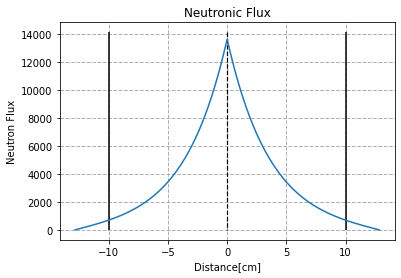

In [8]:
#Plotting the Flux
Sigma_t = 0.25
Sigma_s = 0.15
Sigma_a_val = Sigma_t - Sigma_s

So_val = 10**4
D_val = 1/(3*Sigma_t)
L_val = sp.sqrt(D_val/Sigma_a_val).evalf()

a_val = 20 #cm
a_tilde_val = a_val + 2*0.7104*3*D_val

distance = np.linspace(-a_tilde_val/2,a_tilde_val/2,3000)

Solution_discrete1 = Homo_Equation_Solution_Final.subs({Sigma_a:Sigma_a_val, D:D_val, L:L_val, a_tilde:a_tilde_val, So:So_val})
Solution_discrete2 = sp.lambdify(x,Solution_discrete1, "numpy")
Solution_discrete3 = Solution_discrete2(distance)

plt.plot(distance, Solution_discrete3)
plt.grid("gray", linestyle="--", linewidth=1)
plt.xlabel("Distance[cm]")
plt.ylabel("Neutron Flux")
plt.title("Neutronic Flux")
plt.vlines(0,max(Solution_discrete3)+500,min(Solution_discrete3),linestyle="--", color="black",linewidth=1.2)
plt.vlines(-a_val/2,max(Solution_discrete3)+500,min(Solution_discrete3),linestyle="-", color="black",linewidth=1.5)
plt.vlines(a_val/2,max(Solution_discrete3)+500,min(Solution_discrete3),linestyle="-", color="black",linewidth=1.5)

# Multiregion Problem

Imagine now to replace the vacuum by a material of different composition than the slab itself. In this case we do not have Vacuum Boundary Conditions but we have to impose Interface Conditions for the continuity of the Flux and the Current across the interface between the two regions; along with these new BCs we can exploit our erlier condition on the limitation of $\phi_2$ as $x\rightarrow \infty$ and $J_1 = \frac{S_0}{2}$ as $x\rightarrow 0$.

The Equations in the two regions are:

\begin{aligned}
 &\\
 &\frac{d^{2} \psi_1(z)}{d z^{2}} - \frac{1}{L_1^{2}}\psi_1(z) = 0
 \;\;\;\;\;for\;\;0 < z < \frac{b}{2}\\
 &\\
 &\frac{d^{2} \psi_2(z)}{d z^{2}} - \frac{1}{L_2^{2}}\psi_2(z) = 0
 \;\;\;\;\;for\;\;\frac{b}{2} < z < \infty\\
 &\\
\end{aligned}

*BOUNDARY CONDITIONS*
\begin{aligned}
 &(a)\;\;\;\;\;\lim_{z \rightarrow 0^{+}} J_1(z) = \frac{S_0}{2} \\
 &\\
 &(b)\;\;\;\;\;\lim_{z \rightarrow \infty} \psi_2(z) < \infty \\
 &\\
 &(c)\;\;\;\;\;\psi_1(\frac{b}{2}) = \psi_2(\frac{b}{2}) \\
 &\\
 &(d)\;\;\;\;\;J_1(\frac{b}{2}) = J_2(\frac{b}{2}) \\
\end{aligned}

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

#Variables and Functions
z, b = sp.symbols("z, b")

So_new = sp.Symbol("S_0")
D_new = sp.symbols("D:2")
L_new = sp.symbols("L:2")
Sigma_a_new = sp.Symbol("Sigma_a")

Psi = sp.symbols("Psi:2", cls=sp.Function)

C1_new, C2_new = sp.symbols("C1, C2")
A1, A2 = sp.symbols("A1, A2")
B1, B2 = sp.symbols("B1, B2")

In [10]:
#Homogeneous Equation Region 0
Equation_Region1 = sp.Eq(Psi[0](z).diff(z,2) - 1/(L_new[0]**2)*Psi[0](z) , 0)
print("Equation Region 1:\n")
Equation_Region1

Equation Region 1:



Eq(Derivative(Psi0(z), (z, 2)) - Psi0(z)/L0**2, 0)

In [11]:
#Homogeneous Equation Region 1
Equation_Region2 = sp.Eq(Psi[1](z).diff(z,2) - (1/L_new[1]**2)*Psi[1](z) , 0)
print("Equation Region 2:\n")
Equation_Region2

Equation Region 2:



Eq(Derivative(Psi1(z), (z, 2)) - Psi1(z)/L1**2, 0)

In [12]:
#Solution Region 1
Solution0 = sp.dsolve(Equation_Region1, Psi[0](z))
Solution0 = Solution0.subs({C1_new:A1,C2_new:A2})
print("Solution Region 1:\n")
Solution0 

Solution Region 1:



Eq(Psi0(z), A1*exp(-z/L0) + A2*exp(z/L0))

In [13]:
#Solution Region 2
Solution1 = sp.dsolve(Equation_Region2, Psi[1](z))
Solution1 = Solution1.subs({C1_new:B1,C2_new:B2})
print("Solution Region 2:\n")
Solution1

Solution Region 2:



Eq(Psi1(z), B1*exp(-z/L1) + B2*exp(z/L1))

In [14]:
#Imposing BC (b)/ flux 2 bounded
Solution1 = Solution1.subs(B2,0).evalf()
print("Solution Region 2:\n")
Solution1

Solution Region 2:



Eq(Psi1(z), B1*exp(-z/L1))

In [15]:
#Imposing BC (a)
Current0 = -D_new[0] * Solution0.rhs.diff(z)

Limit_EquationBCa = sp.Eq(sp.limit(Current0,z,0) , So_new/2)

print("Boundary Condition (a):\n")
Limit_EquationBCa

Boundary Condition (a):



Eq(-D0*(-A1 + A2)/L0, S_0/2)

In [16]:
#Imposing BC (d)
Current1 = -D_new[1] * Solution1.rhs.diff(z)

EquationBCd = sp.Eq(Current1.subs(z,b/2) , Current0.subs(z,b/2))

print("Equation of Equality of Currents:\n")
EquationBCd

Equation of Equality of Currents:



Eq(B1*D1*exp(-b/(2*L1))/L1, -D0*(-A1*exp(-b/(2*L0))/L0 + A2*exp(b/(2*L0))/L0))

In [17]:
#Limit Equation BCa expressed in A1
Solution_Limit_EquationBCa = sp.solve(Limit_EquationBCa, A1)[0]
print("A1 in function of A2:\n")
sp.Eq(A1 , Solution_Limit_EquationBCa)

A1 in function of A2:



Eq(A1, A2 + L0*S_0/(2*D0))

In [18]:
#BC (d) + A1 expression
Current0 = Current0.subs(A1 , Solution_Limit_EquationBCa)
EquationBCd = sp.Eq(Current1.subs(z,b/2) , Current0.subs(z,b/2))

print("Equation of Equality of Currents:\n")
EquationBCd

Equation of Equality of Currents:



Eq(B1*D1*exp(-b/(2*L1))/L1, -D0*(A2*exp(b/(2*L0))/L0 - (A2 + L0*S_0/(2*D0))*exp(-b/(2*L0))/L0))

In [19]:
#Imposing A1/A2 to Flux in region 1
New_Solution0 = Solution0.subs(A1 , Solution_Limit_EquationBCa)
print("New Solution Region 1:\n")
New_Solution0

New Solution Region 1:



Eq(Psi0(z), A2*exp(z/L0) + (A2 + L0*S_0/(2*D0))*exp(-z/L0))

In [20]:
#Recalling flux in region 2
New_Solution1 = Solution1
print("New Solution Region 2:\n")
New_Solution1

New Solution Region 2:



Eq(Psi1(z), B1*exp(-z/L1))

In [21]:
#Imposing BC (c)
EquationBCc = sp.Eq(New_Solution0.rhs.subs(z,b/2) , New_Solution1.rhs.subs(z,b/2))

print("Equation of Equality of Fluxes:\n")
EquationBCc

Equation of Equality of Fluxes:



Eq(A2*exp(b/(2*L0)) + (A2 + L0*S_0/(2*D0))*exp(-b/(2*L0)), B1*exp(-b/(2*L1)))

In [22]:
#Recalling The Two Terms of the system
Term1 = EquationBCd
Term2 = EquationBCc

B1_in_A2 = sp.solve(Term1 , B1)[0]

Term2 = Term2.subs(B1,B1_in_A2)

A2_Solution = sp.solve(Term2 , A2)[0]
B1_Solution = B1_in_A2.subs(A2 , A2_Solution)

In [23]:
#A2
sp.Eq(A2 , A2_Solution)

Eq(A2, L0*S_0*(D0*L1 - D1*L0)/(2*D0*(D0*L1*exp(b/L0) - D0*L1 + D1*L0*exp(b/L0) + D1*L0)))

In [24]:
#B1
sp.Eq(B1 , B1_Solution)

Eq(B1, L1*(-L0*S_0*(D0*L1 - D1*L0)*exp(b/L0)/(D0*L1*exp(b/L0) - D0*L1 + D1*L0*exp(b/L0) + D1*L0) + L0*S_0*(D0*L1 - D1*L0)/(D0*L1*exp(b/L0) - D0*L1 + D1*L0*exp(b/L0) + D1*L0) + L0*S_0)*exp(b/(2*L1) - b/(2*L0))/(2*D1*L0))

In [25]:
#Final Solution Flux region 1
Final_Solution0 = New_Solution0.subs({A2:A2_Solution})
print("Solution for flux in region 1:\n")
Final_Solution0

Solution for flux in region 1:



Eq(Psi0(z), (L0*S_0*(D0*L1 - D1*L0)/(2*D0*(D0*L1*exp(b/L0) - D0*L1 + D1*L0*exp(b/L0) + D1*L0)) + L0*S_0/(2*D0))*exp(-z/L0) + L0*S_0*(D0*L1 - D1*L0)*exp(z/L0)/(2*D0*(D0*L1*exp(b/L0) - D0*L1 + D1*L0*exp(b/L0) + D1*L0)))

In [26]:
#Final Solution Flux region 2
Final_Solution1 = New_Solution1.subs({B1:B1_Solution})
print("Solution for flux in region 2:\n")
Final_Solution1

Solution for flux in region 2:



Eq(Psi1(z), L1*(-L0*S_0*(D0*L1 - D1*L0)*exp(b/L0)/(D0*L1*exp(b/L0) - D0*L1 + D1*L0*exp(b/L0) + D1*L0) + L0*S_0*(D0*L1 - D1*L0)/(D0*L1*exp(b/L0) - D0*L1 + D1*L0*exp(b/L0) + D1*L0) + L0*S_0)*exp(-z/L1)*exp(b/(2*L1) - b/(2*L0))/(2*D1*L0))

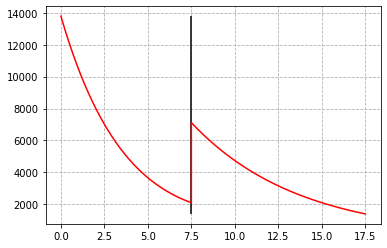

In [27]:
#Plotting
Sigma_t0 = 0.25
Sigma_s0 = 0.15
Sigma_a_val0 = Sigma_t0 - Sigma_s

Sigma_t1 = 0.22
Sigma_s1= 0.18
Sigma_a_val1 = Sigma_t1 - Sigma_s1

D0 = 1/(3*Sigma_t0)
D1 = 1/(3*Sigma_t1)
L0 = sp.sqrt(D0/Sigma_a_val0).evalf()
L1 = sp.sqrt(D1/Sigma_a_val1).evalf()

b_val = 15 #cm

Final_Solution0 = Final_Solution0.subs({So_new:So_val, L_new[0]:L0, L_new[1]:L1, b:b_val, D_new[0]:D0, D_new[1]:D1})
Final_Solution1 = Final_Solution1.subs({So_new:So_val, L_new[0]:L0, L_new[1]:L1, b:b_val, D_new[0]:D0, D_new[1]:D1})

Numpy_Solution0 = sp.lambdify(z,Final_Solution0.rhs, "numpy")
Numpy_Solution1 = sp.lambdify(z,Final_Solution1.rhs, "numpy")

distance1 = np.linspace(0,b_val/2,300)
distance2 = np.linspace(0,10,300)

Numpy_Solution0_Final = Numpy_Solution0(distance1)
Numpy_Solution1_Final = Numpy_Solution1(distance2)

graph = np.concatenate((Numpy_Solution0_Final,Numpy_Solution1_Final), axis=None)
distance = np.concatenate((distance1,(distance1[-1]+distance2)), axis=None)
plt.plot(distance,graph, color="red")

plt.vlines(distance1[-1], min(Numpy_Solution1_Final), max(Numpy_Solution0_Final) ,linestyle="-", linewidth=1.5)
plt.grid("gray", linewidth=0.8, linestyle="--")

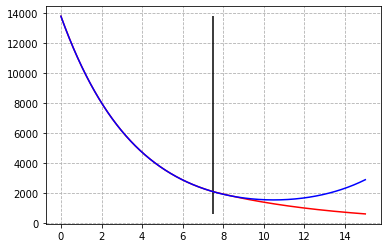

In [32]:
distance1 = np.linspace(0,b_val/2,300)
distance2 = np.linspace(b_val/2,15,300)
distance3 = np.linspace(0,15,500)

Numpy_Solution0_Final = Numpy_Solution0(distance1)
Numpy_Solution1_Final = Numpy_Solution1(distance2)
Numpy_Solution0_Final2 = Numpy_Solution0(distance3)

graph = np.concatenate((Numpy_Solution0_Final,Numpy_Solution1_Final), axis=None)
distance = np.concatenate((distance1,distance2), axis=None)
plt.plot(distance,graph, color="red")
plt.plot(distance3,Numpy_Solution0_Final2, "blue")

plt.vlines(distance1[-1], min(Numpy_Solution1_Final), max(Numpy_Solution0_Final) ,linestyle="-", linewidth=1.5)
plt.grid("gray", linewidth=0.8, linestyle="--")